# AI Chat Code

In [16]:
import anthropic
import traceback
from typing import List, Dict, Tuple
from markdownify import markdownify

from openai import OpenAI, OpenAIError


def converse_openai(prompt: str, messages: List[Dict[str, str]]) -> Tuple[str, List[Dict[str, str]]]:
    """
    Given a conversation history, generate a response string from the OpenAI API.

    :param prompt: a user prompt string to continue the conversation

    :param messages: a conversation history with the following format:
    `[ { "role": "user", "content": "Hello, how are you?" },
       { "role": "assistant", "content": "I am doing well, how can I help you today?" } ]`

    :return: the response string and the updated conversation history
    """
    client = OpenAI(
        # This is the default and can be omitted
        base_url='http://aitools.cs.vt.edu:7860/openai/v1',
        api_key="aitools")
    
    try:
        messages.append({"role": "user", "content": prompt})
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=messages,
            max_tokens=3000
        )
        text = response.choices[0].message.content
        messages.append({"role": "assistant", "content": text})
        return text, messages

    except OpenAIError as e:
        traceback.print_exc()
        raise Exception(f"OpenAI Error: {str(e)}")
    except Exception as e:
        traceback.print_exc()
        raise Exception(f"General Error: {str(e)}")

def converse_anthropic(prompt: str, messages: List[Dict[str, str]]) -> Tuple[str, List[Dict[str, str]]]:
    client = anthropic.Anthropic(api_key="aitools", 
                                 base_url="http://aitools.cs.vt.edu:7860/anthropic/v1")
    
    # Add the user's message to the list of messages
    if messages is None:
        messages = []
    
    messages.append({"role": "user", "content": prompt})
    # Construct the request payload for Anthropic through the proxy
    response = client.messages.create(
        model="claude-3-5-sonnet-20240620",
        max_tokens=4000,
        messages=messages
    )
    
    # Extract the relevant information from the response
    content_text = response.content[0].text  # Access the text of the first message
    # Add the assistant's message to the list of messages
    messages.append({"role": "assistant", "content": content_text})
    
    return response, messages


# Starting Prompt

In [17]:
product_name = "Ducky"

product_description = f"""
{product_name} is an AI-powered coding assistant tailored for software developers and learners. 

Its primary function is to facilitate the learning process about various software topics. 

{product_name} offers a quick chat feature that serves to answer questions regarding coding issues. 

Furthermore, its blueprint feature acts as a knowledge repository, enabling users to 
generate specific pre-planned artifacts such as schemas, types, and APIs.
"""


def starting_prompt():
    return f"""
Forget all previous instructions and context.  

You job is to learn and understand the following text about a product.
```
{product_description}
```
Acknowledge you have understood the product by giving a terse 1 sentence summary or acknowledgement.
"""

In [18]:
history = []
text, history = converse_openai(starting_prompt(), history)

print(markdownify(text))

Ducky is an AI-powered coding assistant designed to help software developers and learners by providing a chat feature for coding questions and a blueprint feature for generating artifacts.


# Business Problem Statement

In [21]:
def business_problem_statement_prompt():
    return  f"""This business problem statement will have 5 points: Situation, Problem, Implication, Benefit and Vision. 
    
    Use the starting prompt to derive and construct a business problem that Ducky aims to address. 
    
    Think about the pain points software developers and learners might experience, and how Ducky can be a solution. 
    
    Expand on these points further in their descriptions. 
    
    Don't include the starting prompt. 
    
    Space each point out with a line in between"""

In [22]:
text, history = converse_openai(business_problem_statement_prompt(), history)
print(markdownify(text))

Situation: The field of software development is constantly evolving, with new technologies and programming languages being introduced regularly, creating a need for developers and learners to stay updated and adapt to change.

Problem: Software developers and learners often struggle to keep pace with the rapid advancements in technology, leading to difficulties in acquiring new skills, staying informed about the latest trends, and effectively solving coding issues.

Implication: This lack of up-to-date knowledge and skills can result in developers facing challenges in meeting project deadlines, delivering high-quality code, and staying competitive in the ever-changing tech industry, ultimately hindering their professional growth and success.

Benefit: Ducky's AI-powered coding assistant offers a solution by providing a quick chat feature for answering coding queries, serving as a reliable source of information on various software topics, and offering a blueprint feature to generate spe

# Vision Statement

In [25]:
def vision_statement_prompt():
    return  f"""This business problem statement will have 6 points: For, Who, The, Is, That, Unlike. 
    
    Expand on the definitions. 
    
    Include a final sentence that is separate from the 'Unlike' point which describes how this vision is different than other possible options"""

In [26]:
text, history = converse_openai(vision_statement_prompt(), history)
print(markdownify(text))

For: Ducky aims to revolutionize the way software developers and learners approach coding by offering an AI-powered assistant that streamlines the learning process and provides support for coding-related issues.

Who: The target audience for Ducky includes software developers looking to enhance their skills, as well as learners seeking a comprehensive tool to support their journey in the software development field.

The: In the fast-paced and constantly evolving tech industry, staying informed about new technologies, programming languages, and coding best practices is essential for developers to remain competitive and deliver high-quality projects.

Is: Ducky is a cutting-edge solution that combines AI technology with a user-friendly interface to offer a quick chat feature for answering coding queries and a blueprint feature for generating specific artifacts like schemas, types, and APIs.

That: Unlike traditional learning methods or online resources that may lack interactivity and tai

# Ecosystem Map

In [49]:
def ecosystem_map_prompt():
    return  f"""This Ecosystem Map will have 5 main points: Ecosystem Map for FinFriend, Central System, Direct Interactors, Indirect Interactors, and Environmental Factors. 
    
    There should be 3 points each under Direct and Indirect Interactors and 2 points under Environmental Factors. 
    
    Each point should have a new line space between them. There also needs to be a '---' between each main point with a newline. Each sub-point will have two smaller points which are 'Role' and 'Interaction. 
        
   Finally, include a summary or explanation statement at the bottom, ensure that this sentence wraps properly by breaking into multiple lines for better flow and readability."""

In [50]:
text, history = converse_openai(ecosystem_map_prompt(), history)
print(markdownify(text))

Ecosystem Map for FinFriend
---
Central System
Role: FinFriend functions as a financial management and investment platform.
Interaction: Provides users with tools for budgeting, investing, and financial planning.

---

Direct Interactors
1. Users
Role: Engage with FinFriend for personal finance management.
Interaction: Input financial data, set goals, make investment decisions.

2. Financial Advisors
Role: Provide personalized financial advice and guidance.
Interaction: Review user data, suggest investments, offer planning services.

3. Customer Support Team
Role: Assist users with platform-related queries.
Interaction: Address concerns, provide technical support, help with account management.

---

Indirect Interactors
1. Third-Party Financial Institutions
Role: Offer banking and investment services integrated with FinFriend.
Interaction: Transfer funds, share account information, collaborate on investments.

2. Regulatory Authorities
Role: Establish guidelines and regulations for fin

# Responsibility Matrix

In [51]:
def responsibility_matrix_prompt():
    return  f"""There will be three parts to this. The first is identifiying potential stakeholders for the FinFriend project, also write descriptions of the stakeholders on the same line. There should be at least 9 stakeholders. 
    
    
    Next, build a RACI Matrix for the stakeholders. Next, make a legend for the created RACI Matrix. Make the matrix so that the data is lined up with both the x and y axis. 
    
    To ensure the matrix aligns in a text editor or Markdown renderer, Make sure the columns are evenly spaced using the same number of characters for each column, especially in monospaced fonts.
    
    Include a few sentences at the bottom summarizing the purpose and utility of the RACI Matrix"""

In [52]:
text, history = converse_openai(responsibility_matrix_prompt(), history)
print(markdownify(text))

Potential Stakeholders:
1. Project Sponsor - Provides funding and overall vision for the FinFriend project.
2. Software Developers - Responsible for coding and implementing features of the FinFriend platform.
3. Financial Analysts - Provide expertise in financial matters and contribute to the platform's financial tools.
4. UX/UI Designers - Design the interface and user experience of the FinFriend platform.
5. Marketing Team - Promotes FinFriend and attracts users to the platform.
6. Quality Assurance Team - Tests and ensures the functionality and quality of the FinFriend platform.
7. Data Privacy Experts - Ensure compliance with data protection regulations and maintain user privacy.
8. Customer Support Representatives - Assist users with queries and issues related to the FinFriend platform.
9. Business Analysts - Analyze data and provide insights to support decision-making for the FinFriend project.

RACI Matrix:
```
| Stakeholder | Responsible | Accountable | Consulted | Informed |
|

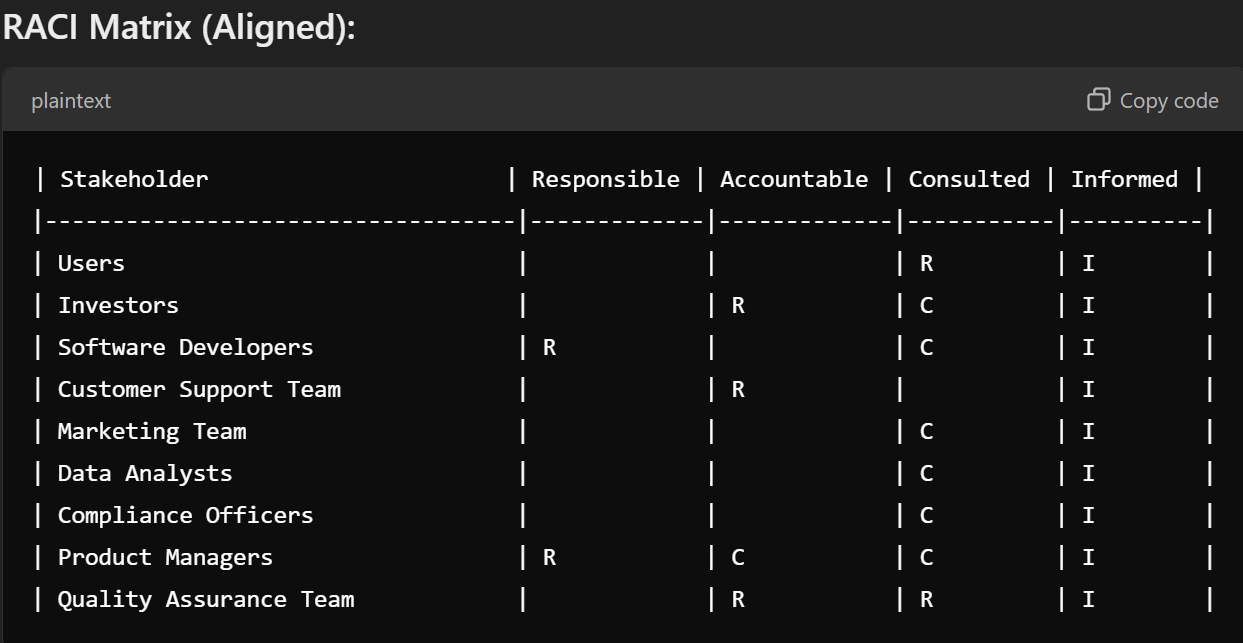